<a href="https://colab.research.google.com/github/yadukrishnanp2001/Mobile-price-range-prediction/blob/main/L_project1_mobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name - Mobile price range prediction**


*  **Project Type - Classification**
*  **Dataset Source - Kaggle**

##**Project Summary**

###The mobile phone industry is highly competitive, and the price of a mobile phone is determined by various factors, including battery power, Bluetooth, camera quality, screen size, and more. In this context, a study was conducted to understand the factors influencing the price range of mobile phones. The study used a dataset containing around 21 variables to predict the price range of mobile phones, categorized as low, medium, high, and very high.


##**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

##**Loading Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Luminar_Dataset/Mobile.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


##**Attributes details**

Battery_power - Total energy a battery can store in one time measured in mAh.

Blue - Has bluetooth or not.

Clock_speed - speed at which microprocessor executes instructions.

Dual_sim - Has dual sim support or not.

Fc - Front Camera mega pixels.

Four_g - Has 4G or not.

Int_memory - Internal Memory in Gigabytes.

M_dep - Mobile Depth in cm.

Mobile_wt - Weight of mobile phone.

N_cores - Number of cores of processor.

Pc - Primary Camera mega pixels.

Px_height - Pixel Resolution Height.

Px_width - Pixel Resolution Width.

Ram - Random Access Memory in Mega.

Touch_screen - Has touch screen or not.

Wifi - Has wifi or not.

Sc_h - Screen Height of mobile in cm.

Sc_w - Screen Width of mobile in cm.

Talk_time - longest time that a single battery charge will last when you are.

Three_g - Has 3G or not.

Wifi - Has wifi or not.

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(High Cost),3(Very High cost).

##**Checking for null values**

In [ ]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

##**Correlation Heat Map**

###Below correlation heatmaps serve various functions, such as identifying correlations between variables, aiding in feature selection by highlighting highly correlated features, facilitating exploratory data analysis by visualizing pairwise correlations, and effectively communicating relationships between variables for feature selection.

<Axes: >

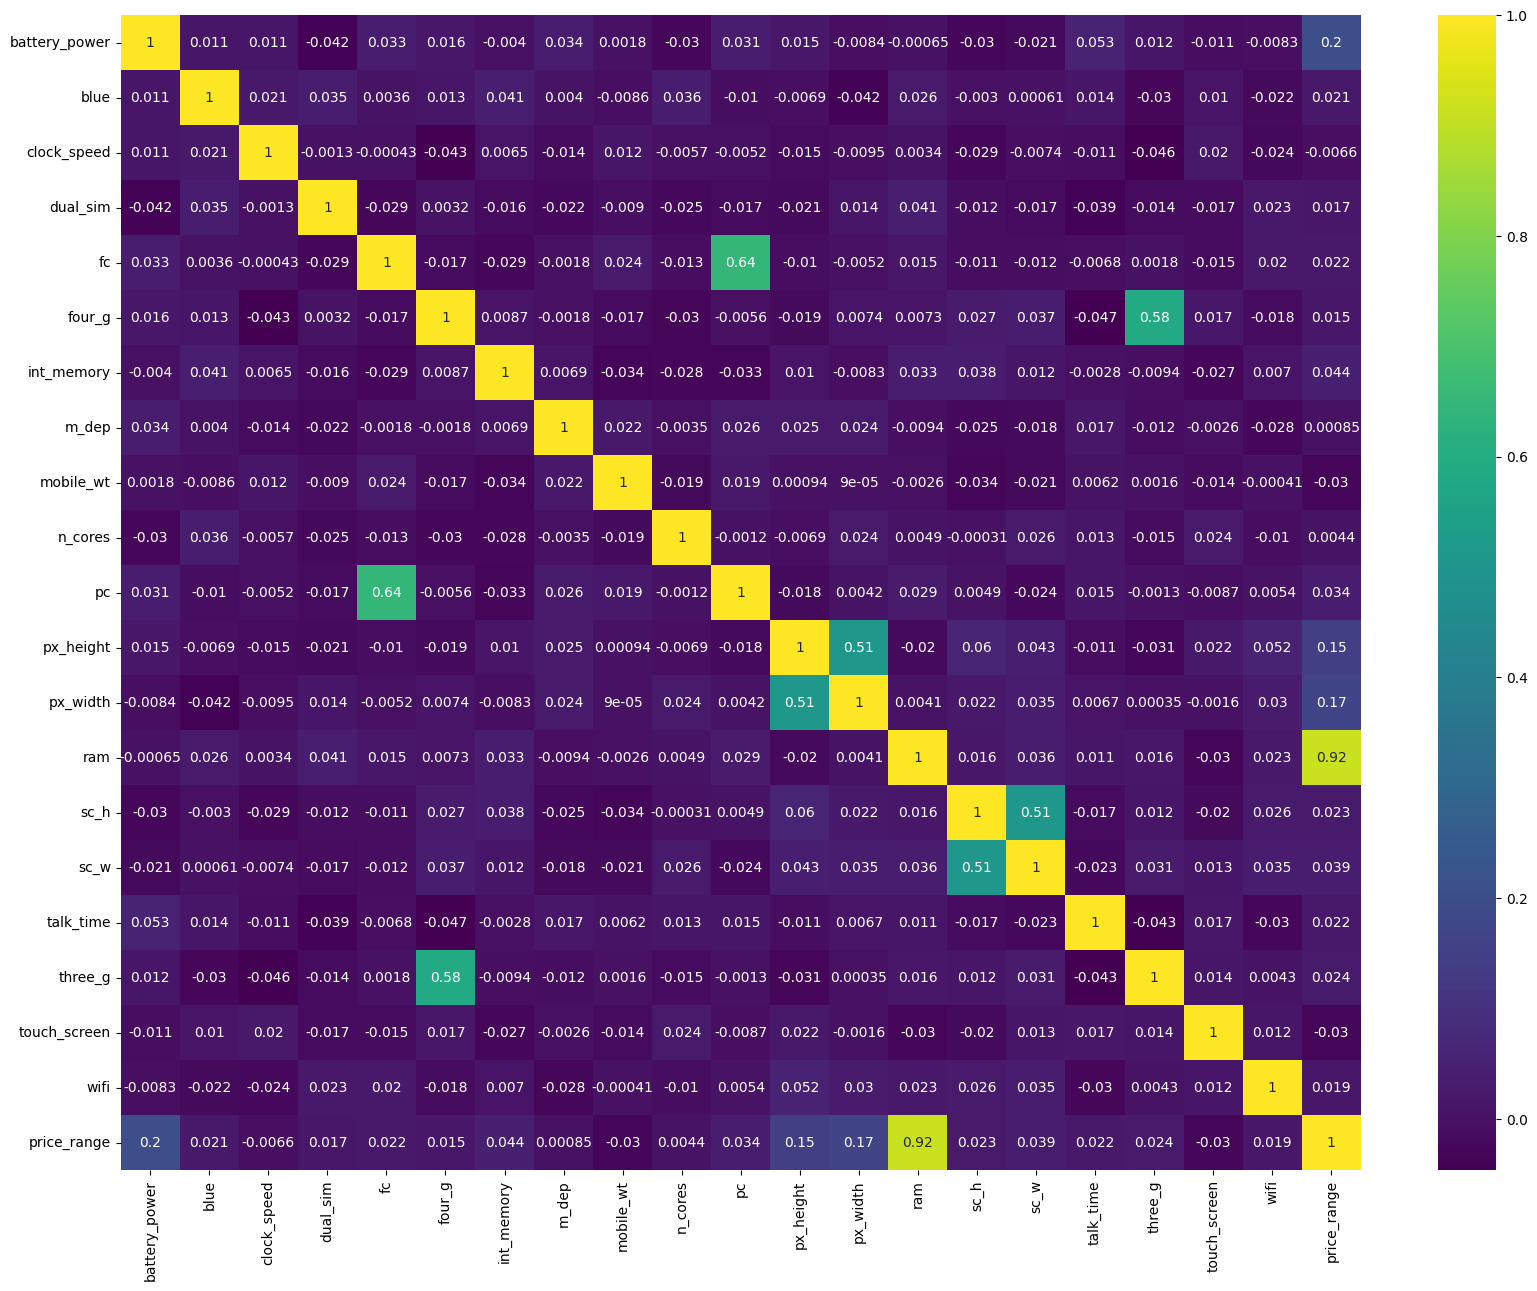

In [ ]:
correlation = df.corr()
plt.figure(figsize=[20, 15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

##**From the correlation heatmap it is clear that ram has the heighest correlation with price range**

###The insights gained from the scatter plot below, such as the positive correlation between RAM and price range, can be valuable for businesses.The businesses can use this information to design and market smartphones with higher RAM for customers willing to pay higher prices, potentially leading to increased revenue and profits.

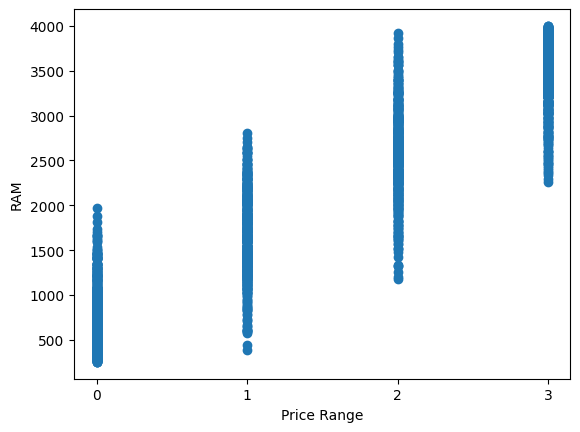

In [ ]:
plt.scatter(df['price_range'], df['ram'])
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0, 1, 2, 3])
plt.show()

##**Feature Selection**


###Feature selection is a critical step in machine learning and statistical analysis, where we identify and keep the most relevant variables for modeling. A common approach involves dropping columns with correlations near zero concerning the target variable. This practice aims to improve predictive power and model interpretability while reducing computational complexity. By excluding features with weak associations to the target variable, we reduce the risk of overfitting and simplify model interpretation

### -  Drop colums having corrilation with price range near to 0


In [ ]:
df.drop(['clock_speed','m_dep','n_cores',],axis=1,inplace=True)
df

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,0,1,0,7,188,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,1,0,1,53,136,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,1,2,1,41,145,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,0,0,0,10,131,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,0,13,1,44,141,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,106,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,1,0,0,39,187,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,1,1,1,36,108,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0,4,1,46,145,5,336,670,869,18,10,19,1,1,1,0


##**Handling Outliers**

###Their is no much outliers are present in the below plot so no need to do much experiment.

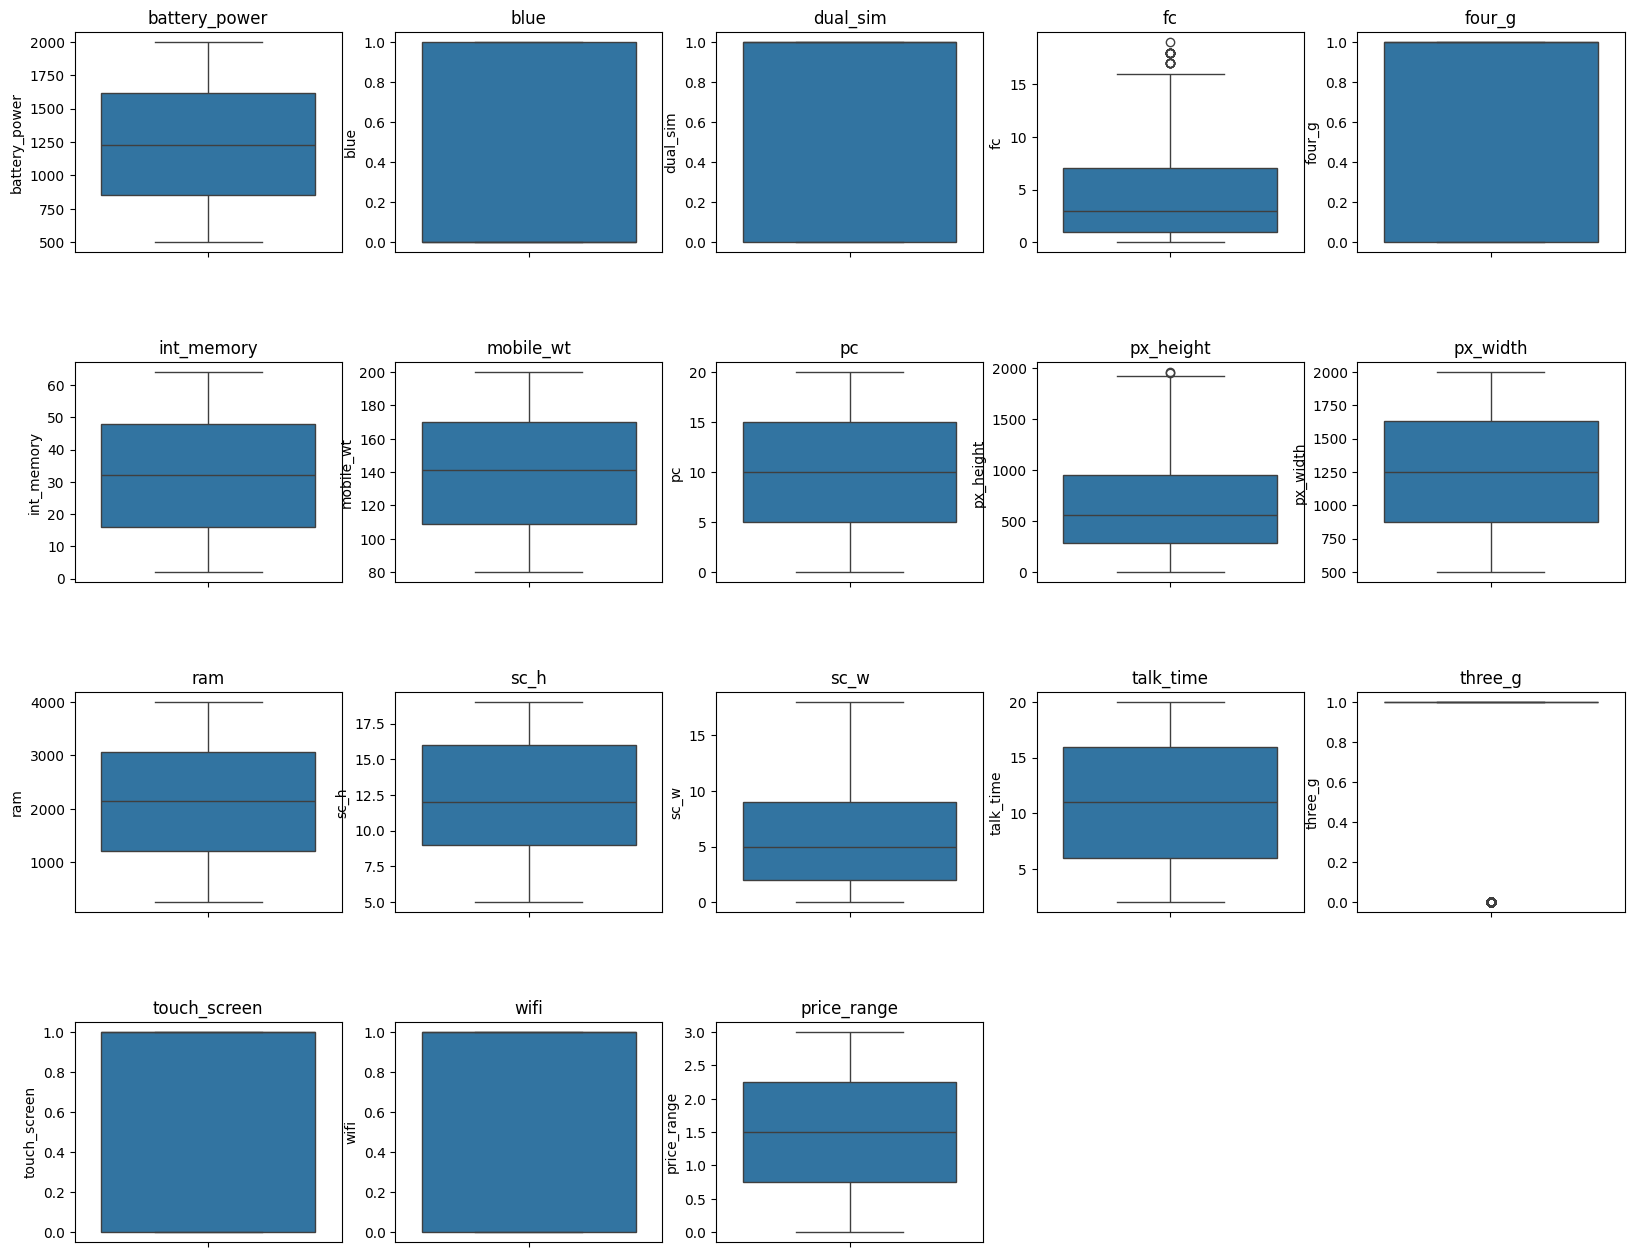

In [ ]:
plt.figure(figsize=(20,20))

# Loop through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid
  plt.subplot(5,5,index+1)
  sns.boxplot(df[item])
  plt.title(item)
  plt.subplots_adjust(hspace=0.5)



In [ ]:
df['price_range'].unique()

array([1, 2, 3, 0])

##**Data Transformation**

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

##**Data Scaling**

###Data scaling is a common preprocessing technique in machine learning, aiming to standardize or normalize feature values. By ensuring comparable scales, typically between 0 and 1 or with a mean of 0 and standard deviation of 1, it prevents features with larger magnitudes from dominating the training process. This benefits algorithms sensitive to variations in feature scales, enhancing model stability and performance

In [ ]:
s = MinMaxScaler()
X_scaled = s.fit_transform(X)

##**Data Splitting**



###1.The code is using a data splitting ratio of 70:30 for the training and test sets, respectively, as specified by the test_size parameter set to 0.30. This means that 70% of the data will be used for training the model, and 30% of the data will be used for testing the model's performance.
###2.   The random_state parameter is set to 42, which is an arbitrary number used to ensure that the data is split in a reproducible way. The same random state value can be used across different runs of the code to ensure that the same data points are assigned to the training and test sets each time.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 17), (600, 17), (1400,), (600,))

##**Machine Learning model implimentation**


###In this project, we implemented and evaluated multiple machine learning algorithms to determine their performance.Different algorithms were trained so that the primary objective was to identify the most effective algorithm in terms of accuracy and other relevant metrics.This comparative study enhances our understanding of the problem domain and guides the development of robust machine learning solutions.

In [ ]:
model1 = KNeighborsClassifier()
model2 = SVC()
model3 = GaussianNB()
model4 = DecisionTreeClassifier(random_state=42)
model5 = RandomForestClassifier(random_state=42)
model6 = AdaBoostClassifier(random_state=42)
model7 = XGBClassifier()

models = [model1,model2,model3,model4,model5,model6,model7]

for i in models:
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    print(i)
    print(classification_report(y_test, y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.51      0.60      0.55       151
           1       0.26      0.33      0.29       146
           2       0.29      0.31      0.30       148
           3       0.64      0.34      0.44       155

    accuracy                           0.40       600
   macro avg       0.43      0.39      0.40       600
weighted avg       0.43      0.40      0.40       600

SVC()
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       151
           1       0.82      0.82      0.82       146
           2       0.81      0.82      0.81       148
           3       0.91      0.89      0.90       155

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600

GaussianNB()
              precision    recall  f1-score   support

           0       0.91      0.89

##**Hyperparameter Tuning**

###In this project, i used RandomizedSearchCV, a method for hyperparameter optimization in machine learning, to find the best parameters for our model. RandomizedSearchCV efficiently explores parameter combinations to maximize model performance. This approach fine-tuned our model, resulting in improved predictive accuracy. Documenting the hyperparameter tuning process with RandomizedSearchCV ensures transparency and reproducibility, enhancing the credibility of our machine learning model

##**Hyperparameter tumimg on SVM**

In [ ]:
model_svc = SVC()
params_svc = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[1,2,3,4,5],
           'gamma':['scale', 'auto'], 'cache_size':[100,200,300],
           'decision_function_shape':['ovo','ovr'],
           'C': uniform(0.1, 10),
           'coef0': uniform(-1, 1)}

cv_svc = RandomizedSearchCV(model_svc, params_svc, cv=10, scoring='accuracy')
cv_svc.fit(X_train, y_train)
print(cv_svc.best_params_)

{'C': 5.738458126854729, 'cache_size': 300, 'coef0': -0.822908703859985, 'decision_function_shape': 'ovo', 'degree': 5, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
model = SVC(kernel='linear', gamma='scale', degree=4, decision_function_shape='ovo', cache_size=200, coef0=-0.12568480496155576, C= 9.640217959866897)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       151
           1       0.92      0.99      0.95       146
           2       0.98      0.94      0.96       148
           3       0.97      0.98      0.98       155

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



##**Hyperparameter tuning on XGboost classifier**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

model_xgb = XGBClassifier(ramdom_state=42)
params_xgb = {'loss':['log_loss','exponential'],'learning_rate':[0.1,0.05,0.2,0.25,0.3],
           'n_estimators':[100,200,300],'criterion':['friedman_mse','squared_error'],
           'max_depth':[3,4,5,6,7],'max_features':['sqrt','log2']}

cv_xgb = RandomizedSearchCV(model_xgb, params_xgb, cv=10, scoring='accuracy')
cv_xgb.fit(X_train, y_train)
print(cv_xgb.best_params_)

{'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 7, 'loss': 'exponential', 'learning_rate': 0.3, 'criterion': 'friedman_mse'}


In [ ]:
model = XGBClassifier(n_estimators=200,max_features='sqrt',max_depth=7,loss='exponential',learning_rate=0.3,criterion='friedman_mse',random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       151
           1       0.88      0.95      0.91       146
           2       0.91      0.84      0.87       148
           3       0.92      0.94      0.93       155

    accuracy                           0.92       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.92      0.92      0.92       600



##**Hyperparameter tuning on RandomForest Classifier**

In [ ]:
import warnings
from scipy.stats import randint
warnings.filterwarnings('ignore')

model_rf = RandomForestClassifier()
params_rf = {'n_estimators': randint(10, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']}

cv_rf = RandomizedSearchCV(model_rf, params_rf, cv=10, scoring='accuracy')
cv_rf.fit(X_train, y_train)
print(cv_rf.best_params_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 39, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 12, 'n_estimators': 288}


In [ ]:
model = RandomForestClassifier(n_estimators=288, min_samples_split=12, max_features='auto', max_depth=39, criterion='entropy',bootstrap=False,min_samples_leaf=8)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.82      0.90      0.86       146
           2       0.88      0.78      0.83       148
           3       0.92      0.94      0.93       155

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



##**Model Selection**

###I evaluated several machine learning algorithms and found that Support Vector Classifier (SVC), RandomForestClassifier, and XGBoost Classifier demonstrated strong predictive accuracy. Employing Randomized CV, I optimized the parameters for these models to enhance their performance. Upon comparing the three models, SVC achieved the highest accuracy at 96%, followed by XGBoost at 92% and RandomForest at 89%. Consequently, I selected SVC as the preferred model due to its superior accuracy

# **CONCLUSION**

##In summary, our exploratory data analysis (EDA) uncovered a dataset comprising mobile phones categorized into four price ranges. Each range exhibited a roughly equal distribution of devices, while Bluetooth usage was evenly split at 50-50. Notably, we observed a direct correlation between RAM and battery power with price range, indicating higher-priced phones tend to offer superior performance in these aspects. Interestingly, we also noted a trend where pricier phones tend to weigh less, suggesting manufacturers prioritize lightweight design for premium models. Our experiments highlighted RAM, battery power, and pixel quality as pivotal factors influencing mobile phone pricing. Ultimately, through rigorous experimentation, we determined Support Vector Classifier (SVC) algorithm, complemented by hyperparameter tuning, as optimal approaches for accurately predicting mobile phone price ranges.